# **Practica 1**
#### _Alberto García Doménech - Pablo Daurell Marina_ (Grupo 10)
***

## Parte 2(Clasificacion)

In [22]:
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_breast_cancer

In [23]:
#cargamos el conjunto de datos sobre cancer de pecho
dataset = load_breast_cancer()

In [24]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

#### 1) Descripción del conjunto de datos:
**Nombre:** Breast cancer  
**Descripción:** 30 propiedades distintas de varios tumores de pecho, clasificados como tumores malignos o benignos.   
**Tipos de cada variable:**

In [25]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [26]:
df.groupby(['target']).describe()

mean radius                                                             \
             count       mean       std     min     25%     50%    75%    max   
target                                                                          
0            212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1            357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

       mean texture             ... worst symmetry          \
              count       mean  ...            75%     max   
target                          ...                          
0             212.0  21.604906  ...       0.359225  0.6638   
1             357.0  17.914762  ...       0.298300  0.4228   

       worst fractal dimension                                         \
                         count      mean       std      min       25%   
target                                                                  
0                        212.0  0.091530  0.021553  0.05504  0.076302   
1                        357.0  0.079442  0.013804  0.05521  0.070090   

                                   
            50%       75%     max  
target                             
0       0.08760  0.102625  0.2075  
1       0.07712  0.085410  0.1486  

[2 rows x 240 columns]

**Frecuencia de cada clase:**

In [27]:
df['target'].value_counts() / df['target'].count() * 100

1    62.741652
0    37.258348
Name: target, dtype: float64

Vemos que la clase maligna (1) es bastante más común que la clase benigna (0)

In [ ]:
#como vemos arriba, tenemos 30 variables, por lo que usamos el atributo corner para evitar pintar excesivas variables
sns.pairplot(df,corner=True,hue = "target")

Teniendo en cuenta que estamos describiendo tres aspectos de cada variable(peor, media y error) vamos obviar las correlaciones claras entre estos tres aspectos de la misma variable.
Podemos observar una clara correlacion entre el radio, el perimetro y el area(algo que tiene sentido ya que las tres son medidas de tamaño).
Aparte, vemos que las tres están bastante correlacionadas con los concave points.
Estos últimos están a su vez relacionados con la concavidad, que a su vez está bastante relacionado con la compactness.
Por lo demás no podemos sacar ninguna conclusión al estar los puntos más dispersos.

In [28]:
df[['mean radius','mean perimeter','mean area','mean concave points','mean compactness','mean concavity']].corr()

,mean radius,mean perimeter,mean area,mean concave points,mean compactness,mean concavity
mean radius,1.000000,0.997855,0.987357,0.822529,0.506124,0.676764
mean perimeter,0.997855,1.000000,0.986507,0.850977,0.556936,0.716136
mean area,0.987357,0.986507,1.000000,0.823269,0.498502,0.685983
mean concave points,0.822529,0.850977,0.823269,1.000000,0.831135,0.921391
mean compactness,0.506124,0.556936,0.498502,0.831135,1.000000,0.883121
mean concavity,0.676764,0.716136,0.685983,0.921391,0.883121,1.000000


**No es necesario normalizar los datos antes de utilizar un arbol de decisión, ya que vamos a clasificar los datos respecto a la variable target que solo puede tomar valores 0(benigno) o 1 (maligno)** 

In [29]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(dataset.data, dataset.target)

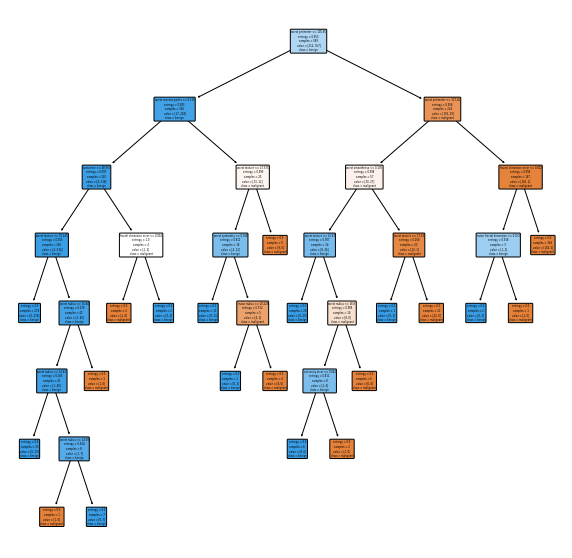

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vamos a mostrar el árbol de decisión generado usando plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names, rounded=True)
plt.savefig('./tree.pdf')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

#dividimos el conjunto de datos en un 30% para test y un 70% de entrenamiento
#por defecto ya esta estratificado
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3) 
#si quisiesemos obtnener los mismos resultados pondriamos la semilla del generador de num aleatorios con random_state =0

# Creamos y entrenamos el árbol de decisión
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1 = clf1.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf1.score(X_train, y_train)
test_accuracy = clf1.score(X_test, y_test)
train_accuracy, test_accuracy

(1.0, 0.9532163742690059)

Como podemos comprobar, obviamente la precision del modelo del entrenamiento es de un 100% mientras que la del test es mayor o igual que 90%

In [32]:
from sklearn.model_selection import cross_validate
import numpy as np

#analizamos los resultados de entrenamiento y de test respecto al parametro del arbol(recall= )
train_accuracy = []
test_accuracy = []

max_depths = range(1, 10)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, dataset.data, dataset.target, scoring='recall', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    

Usamos como atributo la exhaustividad ya que dado que estamos estudiando casos de cancer de pecho creemos más importante detectar todos aquellos pacientes que tengan esta enfermedad, aunque demos falsa alarma a pacientes con tumores benignos. Además, se presupone que si da positivo se seguira estudiando el caso y se descubrira si efectivamente es un verdadero positivo o un falso positivo; en cambio si da negativo no se estudiara si es un verdadero negativo o un falso negativo.


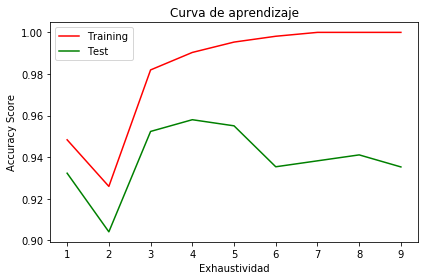

In [33]:
#dibujamos la curva de aprendizaje por profundiad respecto a la exhaustividad
import matplotlib.pyplot as plt

plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

plt.title("Curva de aprendizaje")
plt.xlabel("Exhaustividad"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

**Para max_depths=4, obtenemos el mejor valor para el conjunto de test. Desde ahi podemos observar conmo el conjunto de entrenamiento mejora mientras que el de test empeora por lo que comprobamos que sobreaprende y generaliza peor.**

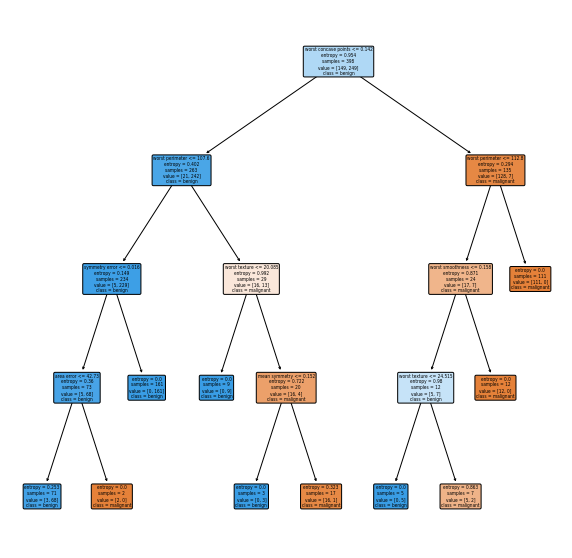

In [34]:
#Finalmente aplicamos lo que hemos aprendido para crear un arbol de clafisicacion optimo
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3,random_state= 0) 

# Creamos y entrenamos el árbol de decisión
clf1 = DecisionTreeClassifier(criterion="entropy",  max_depth =4)
clf1 = clf1.fit(X_train, y_train)

#dibujamos el arbol obtenido
plt.figure(figsize=(10,10))
plot_tree(clf1, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names, rounded=True)
plt.savefig('./tree_optimized.pdf')
plt.show()

Pregunta realizada en el nodo raiz: worst concave points <= 0.142; entropy = 0.954
Pregunta realizada en el hijo izquierdo del nodo raiz: worst perimeter <= 107.6; entropy = 0.402
Pregunta realizada en el hijo derecho del nodo raiz: worst perimeter <= 112.8; entropy = 0.294
mayor poder discriminante: concave points y perimeter

In [35]:
df[['worst concave points','worst perimeter']].corr()

,worst concave points,worst perimeter
worst concave points,1.000000,0.816322
worst perimeter,0.816322,1.000000


In [36]:
import graphviz

# Vamos a mostrar el árbol de decisión generado
dot_data = export_graphviz(clf1, out_file=None, 
                     feature_names=dataset.feature_names,  
                     class_names=dataset.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

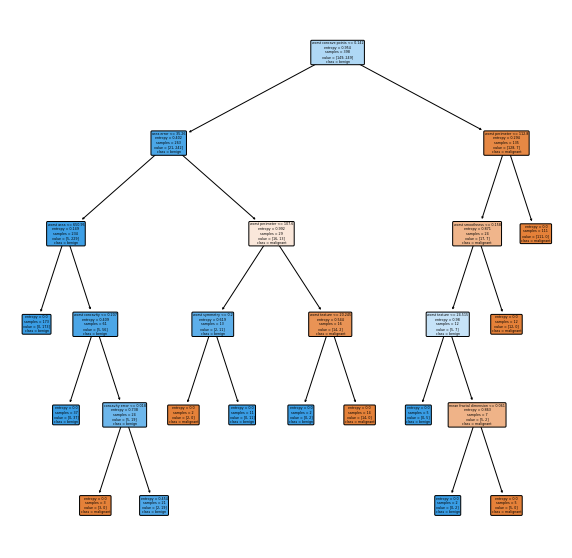

In [37]:
# Creamos y entrenamos el árbol de decisión suboptimo(en este caso con profundidad 5)
clf = DecisionTreeClassifier(criterion="entropy",  max_depth =5)
clf = clf.fit(X_train, y_train)

#dibujamos el arbol obtenido
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names, rounded=True)
plt.savefig('./tree_not_optimized.pdf')
plt.show()

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred =clf.predict(X_test)

In [39]:

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.95238095 0.04761905]
 [0.02777778 0.97222222]]


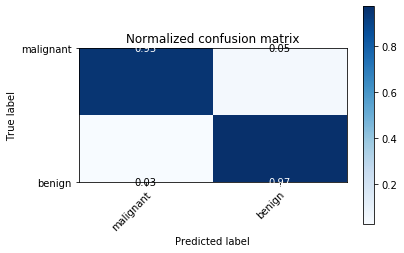

In [40]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_test, y_pred, dataset.target_names, normalize=True)

In [41]:
print(classification_report(y_test,y_pred,target_names = dataset.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        63
      benign       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Clasificador K-NN

In [43]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos con StardardScaler que resta a cada variable su media y la divide
# entre su desviación típica.
# Otra opción sería usar MinMaxScaler que cambia el rango de la variable al intervalo [0,1]
scaler = StandardScaler()
scaler.fit(dataset.data)
dataset['data_scaled'] = scaler.transform(breast.data) # Lo almacenamos en el dataset original

NameError: name 'breast' is not defined